In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Train, Validation, Test Data Set로 나누기**

In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/Machine_Learning/프로젝트2/train.csv",  delimiter=',')
train_data = train_data.drop(columns=["number_faces_var", "number_faces_min", "number_faces_max"], axis=1)
y = train_data.loc[:,'label']
X = train_data.drop(columns=["label"], axis=1)

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state = 123)

In [4]:
test_data = pd.read_csv("/content/drive/MyDrive/Machine_Learning/프로젝트2/X_test.csv",  delimiter=',')
test_data = test_data.drop(columns=["number_faces_var", "number_faces_min", "number_faces_max"], axis=1)

# **데이터 전처리** 
## mean, max, min, std에 따라 구분

In [5]:
mean_num, max_num, min_num, var_num = [],[],[],[]
for c in X.columns:
  if c.split("_")[-1] == 'mean':
    mean_num.append(c)
  elif c.split("_")[-1] == 'max':
    max_num.append(c)
  elif c.split("_")[-1] == 'min':
    min_num.append(c)
  elif c.split("_")[-1] == 'var':
    var_num.append(c)

mean_train = x_train.loc[:,mean_num]
max_train = x_train.loc[:,max_num]
min_train = x_train.loc[:,min_num]
var_train = x_train.loc[:,var_num]

mean_train_y = mean_train.copy()
mean_train_y['label'] = y_train
max_train_y = max_train.copy()
max_train_y['label'] = y_train
min_train_y = min_train.copy()
min_train_y['label'] = y_train
var_train_y = var_train.copy()
var_train_y['label'] = y_train

mean_val = x_valid.loc[:,mean_num]
max_val = x_valid.loc[:,max_num]
min_val = x_valid.loc[:,min_num]
var_val = x_valid.loc[:,var_num]

In [6]:
mean_test = test_data.loc[:,mean_num]
max_test = test_data.loc[:,max_num]
min_test = test_data.loc[:,min_num]
var_test = test_data.loc[:,var_num]

# **Data Analysis**
https://colab.research.google.com/drive/1eXfCQ1YzW7vrz_6H4iBPTFNr4bh8Mo6Q?usp=sharing

## **Normalization**

In [7]:
scaler = preprocessing.StandardScaler()

scaler.fit(x_train)
train_norm = scaler.transform(x_train)
val_norm = scaler.transform(x_valid)
test_norm = scaler.transform(test_data)

In [8]:
scaler = preprocessing.StandardScaler()

scaler.fit(mean_train)
mean_train_norm = scaler.transform(mean_train)
mean_val_norm = scaler.transform(mean_val)
mean_test_norm = scaler.transform(mean_test)

In [9]:
scaler = preprocessing.StandardScaler()

scaler.fit(max_train)
max_train_norm = scaler.transform(max_train)
max_val_norm = scaler.transform(max_val)
max_test_norm = scaler.transform(max_test)

In [10]:
scaler = preprocessing.StandardScaler()

scaler.fit(min_train)
min_train_norm = scaler.transform(min_train)
min_val_norm = scaler.transform(min_val)
min_test_norm = scaler.transform(min_test)

In [11]:
scaler = preprocessing.StandardScaler()

scaler.fit(var_train)
var_train_norm = scaler.transform(var_train)
var_val_norm = scaler.transform(var_val)
var_test_norm = scaler.transform(var_test)

In [12]:
train_norm = [mean_train_norm, max_train_norm, min_train_norm, var_train_norm]
val_norm = [mean_val_norm, max_val_norm, min_val_norm, var_val_norm]
test_norm = [mean_test_norm, max_test_norm, min_test_norm, var_test_norm]

best_xgb = [None for _ in range(4)]
val_pred = [None for _ in range(4)]
pred = [None for _ in range(4)]
train_pred = [None for _ in range(4)]

# **Feature Importance 측정**

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   26.5s finished


최고의 파라미터 :  {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      1.00      1.00       147

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324

          predicted: 0  predicted: 1
label: 0           177             0
label: 1             0           147
              precision    recall  f1-score   support

           0       0.73      0.78      0.75        41
           1       0.76      0.70      0.73        40

    accuracy                           0.74        81
   macro avg       0.74      0.74      0.74        81
weighted avg       0.74      0.74      0.74        81

          predicted: 0  predicted: 1
label: 0            32             9
label: 1            12            28

Fitting 5 folds for each of 48 candidates, totallin

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   24.1s finished


최고의 파라미터 :  {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      1.00      1.00       147

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324

          predicted: 0  predicted: 1
label: 0           177             0
label: 1             0           147
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        41
           1       0.82      0.68      0.74        40

    accuracy                           0.77        81
   macro avg       0.77      0.76      0.76        81
weighted avg       0.77      0.77      0.76        81

          predicted: 0  predicted: 1
label: 0            35             6
label: 1            13            27

Fitting 5 folds for each of 48 candidates, totalling

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   21.4s finished


최고의 파라미터 :  {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       177
           1       0.87      0.82      0.85       147

    accuracy                           0.86       324
   macro avg       0.86      0.86      0.86       324
weighted avg       0.86      0.86      0.86       324

          predicted: 0  predicted: 1
label: 0           159            18
label: 1            26           121
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        41
           1       0.83      0.75      0.79        40

    accuracy                           0.80        81
   macro avg       0.81      0.80      0.80        81
weighted avg       0.81      0.80      0.80        81

          predicted: 0  predicted: 1
label: 0            35             6
label: 1            10            30

Fitting 5 folds for each of 48 candidates, totallin

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   24.1s finished


최고의 파라미터 :  {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      1.00      1.00       147

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324

          predicted: 0  predicted: 1
label: 0           177             0
label: 1             0           147
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        41
           1       0.82      0.68      0.74        40

    accuracy                           0.77        81
   macro avg       0.77      0.76      0.76        81
weighted avg       0.77      0.77      0.76        81

          predicted: 0  predicted: 1
label: 0            35             6
label: 1            13            27



<function matplotlib.pyplot.show>

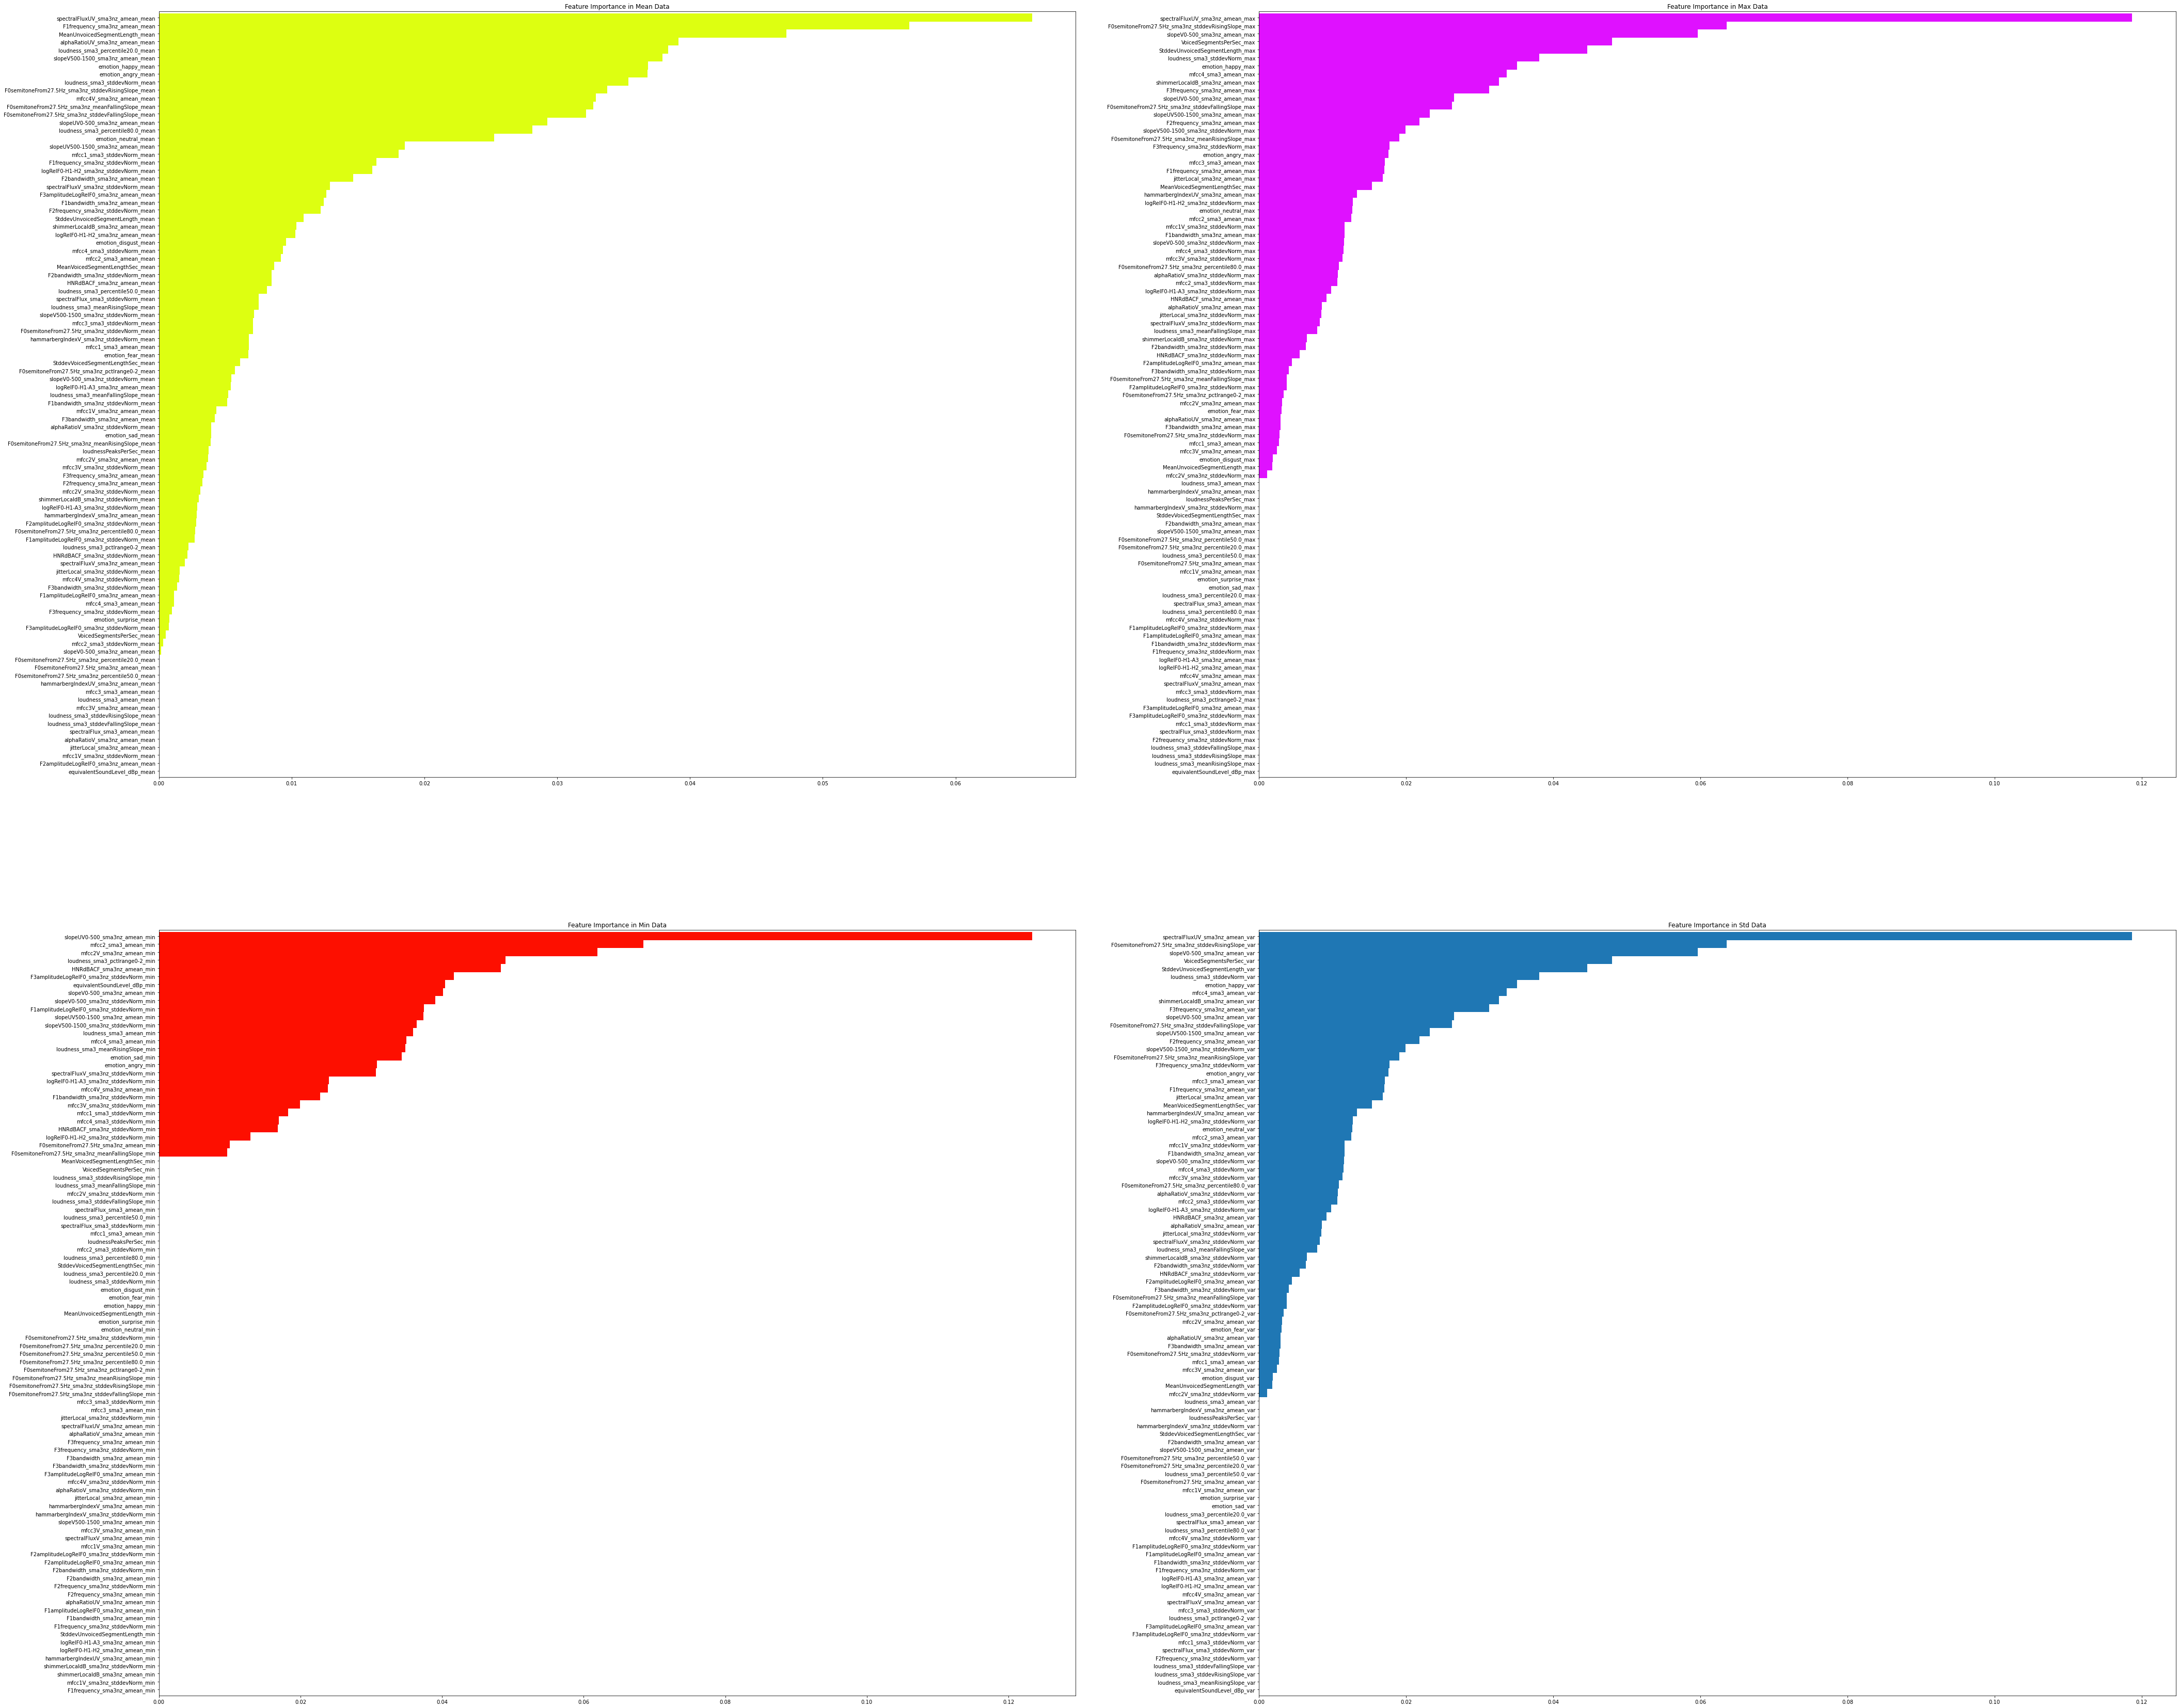

In [13]:
xgb_pram = {'n_estimators' :[20,50,100,200], 
            'learning_rate' :[1, 0.1, 0.5, 0.05],
            'max_depth' : [2,3,4]}

f,ax=plt.subplots(2,2,figsize=(70,60))
for i in range(4):              
  xgb = XGBClassifier()
  xgb_grid = GridSearchCV(xgb, param_grid = xgb_pram, scoring = 'accuracy',n_jobs=-1, verbose =1)
  xgb_grid.fit(train_norm[i], y_train)
  print("최고의 파라미터 : ", xgb_grid.best_params_)

  best_xgb[i] = xgb_grid.best_estimator_
  if i == 0:  
    pd.Series(best_xgb[i].feature_importances_, mean_num).sort_values(ascending=True).plot.barh(width=1,ax=ax[0,0],color='#ddff11')
    ax[0,0].set_title('Feature Importance in Mean Data')
  elif i ==1:
    pd.Series(best_xgb[i].feature_importances_, max_num).sort_values(ascending=True).plot.barh(width=1,ax=ax[0,1],color='#df11ff')
    ax[0,1].set_title('Feature Importance in Max Data')
  elif i ==2:
    pd.Series(best_xgb[i].feature_importances_, min_num).sort_values(ascending=True).plot.barh(width=1,ax=ax[1,0],color='#FD0F00')
    ax[1,0].set_title('Feature Importance in Min Data')
  elif i ==3:
    pd.Series(best_xgb[i].feature_importances_, var_num).sort_values(ascending=True).plot.barh(width=1,ax=ax[1,1])
    ax[1,1].set_title('Feature Importance in Std Data')
  val_pred[i] = best_xgb[i].predict(val_norm[i])
  train_pred[i] = best_xgb[i].predict(train_norm[i])
  pred[i] = best_xgb[i].predict(train_norm[i])
  
  print(classification_report(y_train, train_pred[i]))
  tn, fp, fn, tp = confusion_matrix(y_train, train_pred[i]).ravel()
  confusion_train = pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])
  print(confusion_train)

  print(classification_report(y_valid, val_pred[i]))
  tn, fp, fn, tp = confusion_matrix(y_valid, val_pred[i]).ravel()
  confusion_valid = pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])
  print(confusion_valid)

  print()
plt.show

# **영향을 주지 않는 feature 제거**

In [14]:
importance_mean = best_xgb[0].feature_importances_
a = [i for i in range(95)]
index = [i for i, value in enumerate(importance_mean) if value == 0]
print(len(index))

mean_index = [x for x in a if x not in index]
impor_mean_train = pd.DataFrame(mean_train_norm).loc[:,mean_index]
impor_mean_val = pd.DataFrame(mean_val_norm).loc[:,mean_index]
impor_mean_test = pd.DataFrame(mean_test_norm).loc[:,mean_index]

15


In [15]:
importance_max = best_xgb[1].feature_importances_
index = [i for i, value in enumerate(importance_max) if value == 0]
print(len(index))

max_index = [x for x in a if x not in index]
impor_max_train = pd.DataFrame(max_train_norm).loc[:,max_index]
impor_max_val = pd.DataFrame(max_val_norm).loc[:,max_index]
impor_max_test = pd.DataFrame(max_test_norm).loc[:,max_index]

37


In [16]:
importance_min=best_xgb[2].feature_importances_
index = [i for i, value in enumerate(importance_min) if value ==0]
print(len(index))

min_index = [x for x in a if x not in index]
impor_min_train = pd.DataFrame(min_train_norm).loc[:,min_index]
impor_min_val = pd.DataFrame(min_val_norm).loc[:,min_index]
impor_min_test = pd.DataFrame(min_test_norm).loc[:,min_index]

67


In [17]:
importance_var = best_xgb[3].feature_importances_
index = [i for i, value in enumerate(importance_var) if value == 0]
print(len(index))

var_index = [x for x in a if x not in index]
impor_var_train = pd.DataFrame(var_train_norm).loc[:,var_index]
impor_var_val = pd.DataFrame(var_val_norm).loc[:,var_index]
impor_var_test = pd.DataFrame(var_test_norm).loc[:,var_index]

37


In [18]:
train_impor = [impor_mean_train, impor_max_train, impor_min_train, impor_var_train]
val_impor = [impor_mean_val, impor_max_val, impor_min_val, impor_var_val]
test_impor = [impor_mean_test, impor_max_test, impor_min_test, impor_var_test]

best_xgb = [None for _ in range(4)]
pred = [None for _ in range(4)]
val_pred = [None for _ in range(4)]
train_pred = [None for _ in range(4)]

# **XGBoost**

In [19]:
xgb_pram = {'n_estimators' :[20,50,100,200,300], 
            'learning_rate' :[1, 0.1, 0.5, 0.05],
            'max_depth' : [2,3,4,5,6]}

for i in range(4):              
  xgb = XGBClassifier()
  xgb_grid = GridSearchCV(xgb, param_grid = xgb_pram, scoring = 'accuracy',n_jobs=-1, verbose =1)
  xgb_grid.fit(train_impor[i], y_train)
  best_xgb[i] = xgb_grid.best_estimator_

  print("최고의 파라미터 : ", xgb_grid.best_params_)
  val_pred[i] = best_xgb[i].predict(val_impor[i])
  train_pred[i] = best_xgb[i].predict(train_impor[i])
  pred[i] = best_xgb[i].predict(test_impor[i])
  print()

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


최고의 파라미터 :  {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 356 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   48.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


최고의 파라미터 :  {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 200}

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   29.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


최고의 파라미터 :  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 20}

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 356 tasks      | elapsed:   28.7s


최고의 파라미터 :  {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 200}



[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   48.1s finished


In [20]:
import numpy as np
train_df = pd.DataFrame(train_pred).transpose()
val_df = pd.DataFrame(val_pred).transpose()
test_df = pd.DataFrame(pred).transpose()

train_mlp = np.asarray(train_df)
val_mlp = np.asarray(val_df)
test_mlp = np.asarray(test_df)

# **MLP**

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

best_acc = 0
for s in ['adam', 'sgd', 'lbfgs']:
  for lr in [0.1, 0.2, 0.5, 0.005]:
    for h in [(5,), (2,2), (6), (10,),(3,3)]:
      for a in [0.05,0.01, 0]:
        print("\nsolver : ", s, ", lr : ", lr, ", hidden layer : ", h, ",alpha : ",a)


        best_mlp = MLPClassifier(solver=s, learning_rate_init=lr, hidden_layer_sizes=h,alpha=a, random_state=11)
        best_mlp.fit(train_mlp, y_train)
        prediction_train = best_mlp.predict(train_mlp)
        prediction_val = best_mlp.predict(val_mlp)

        if accuracy_score(y_valid, prediction_val) > best_acc : 
          best_model = best_mlp
          best_acc = accuracy_score(y_valid, prediction_val)
          prediction = best_mlp.predict(test_mlp)

        print("Train set Accuracy : {0:3f}".format(accuracy_score(y_train, prediction_train)))
        print("Validation set Accuracy : {0:3f}".format(accuracy_score(y_valid, prediction_val)))


solver :  adam , lr :  0.1 , hidden layer :  (5,) ,alpha :  0.05
Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  adam , lr :  0.1 , hidden layer :  (5,) ,alpha :  0.01
Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  adam , lr :  0.1 , hidden layer :  (5,) ,alpha :  0
Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  adam , lr :  0.1 , hidden layer :  (2, 2) ,alpha :  0.05
Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  adam , lr :  0.1 , hidden layer :  (2, 2) ,alpha :  0.01
Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  adam , lr :  0.1 , hidden layer :  (2, 2) ,alpha :  0
Train set Accuracy : 0.996914
Validation set Accuracy : 0.777778

solver :  adam , lr :  0.1 , hidden layer :  6 ,alpha :  0.05
Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  adam , lr :  0.1 , hidden layer :  6 ,alpha :  0.01
Train set Accuracy : 1.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  adam , lr :  0.005 , hidden layer :  (5,) ,alpha :  0.01
Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  adam , lr :  0.005 , hidden layer :  (5,) ,alpha :  0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  adam , lr :  0.005 , hidden layer :  (2, 2) ,alpha :  0.05


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  adam , lr :  0.005 , hidden layer :  (2, 2) ,alpha :  0.01


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  adam , lr :  0.005 , hidden layer :  (2, 2) ,alpha :  0
Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  adam , lr :  0.005 , hidden layer :  6 ,alpha :  0.05


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  adam , lr :  0.005 , hidden layer :  6 ,alpha :  0.01
Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  adam , lr :  0.005 , hidden layer :  6 ,alpha :  0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  adam , lr :  0.005 , hidden layer :  (10,) ,alpha :  0.05
Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  adam , lr :  0.005 , hidden layer :  (10,) ,alpha :  0.01
Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  adam , lr :  0.005 , hidden layer :  (10,) ,alpha :  0
Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  adam , lr :  0.005 , hidden layer :  (3, 3) ,alpha :  0.05


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  adam , lr :  0.005 , hidden layer :  (3, 3) ,alpha :  0.01


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  adam , lr :  0.005 , hidden layer :  (3, 3) ,alpha :  0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  sgd , lr :  0.1 , hidden layer :  (5,) ,alpha :  0.05
Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  sgd , lr :  0.1 , hidden layer :  (5,) ,alpha :  0.01
Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  sgd , lr :  0.1 , hidden layer :  (5,) ,alpha :  0
Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  sgd , lr :  0.1 , hidden layer :  (2, 2) ,alpha :  0.05
Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  sgd , lr :  0.1 , hidden layer :  (2, 2) ,alpha :  0.01
Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  sgd , lr :  0.1 , hidden layer :  (2, 2) ,alpha :  0
Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  sgd , lr :  0.1 , hidden layer :  6 ,alpha :  0.05
Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  sgd , lr :  0.1 ,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  sgd , lr :  0.005 , hidden layer :  (5,) ,alpha :  0.01
Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  sgd , lr :  0.005 , hidden layer :  (5,) ,alpha :  0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  sgd , lr :  0.005 , hidden layer :  (2, 2) ,alpha :  0.05
Train set Accuracy : 0.996914
Validation set Accuracy : 0.728395

solver :  sgd , lr :  0.005 , hidden layer :  (2, 2) ,alpha :  0.01


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train set Accuracy : 0.996914
Validation set Accuracy : 0.728395

solver :  sgd , lr :  0.005 , hidden layer :  (2, 2) ,alpha :  0
Train set Accuracy : 0.996914
Validation set Accuracy : 0.728395

solver :  sgd , lr :  0.005 , hidden layer :  6 ,alpha :  0.05


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  sgd , lr :  0.005 , hidden layer :  6 ,alpha :  0.01
Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  sgd , lr :  0.005 , hidden layer :  6 ,alpha :  0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  sgd , lr :  0.005 , hidden layer :  (10,) ,alpha :  0.05
Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  sgd , lr :  0.005 , hidden layer :  (10,) ,alpha :  0.01


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  sgd , lr :  0.005 , hidden layer :  (10,) ,alpha :  0
Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  sgd , lr :  0.005 , hidden layer :  (3, 3) ,alpha :  0.05


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  sgd , lr :  0.005 , hidden layer :  (3, 3) ,alpha :  0.01
Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  sgd , lr :  0.005 , hidden layer :  (3, 3) ,alpha :  0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train set Accuracy : 1.000000
Validation set Accuracy : 0.703704

solver :  lbfgs , lr :  0.1 , hidden layer :  (5,) ,alpha :  0.05
Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  lbfgs , lr :  0.1 , hidden layer :  (5,) ,alpha :  0.01
Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  lbfgs , lr :  0.1 , hidden layer :  (5,) ,alpha :  0
Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  lbfgs , lr :  0.1 , hidden layer :  (2, 2) ,alpha :  0.05
Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  lbfgs , lr :  0.1 , hidden layer :  (2, 2) ,alpha :  0.01
Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  lbfgs , lr :  0.1 , hidden layer :  (2, 2) ,alpha :  0
Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  lbfgs , lr :  0.1 , hidden layer :  6 ,alpha :  0.05
Train set Accuracy : 1.000000
Validation set Accuracy : 0.753086

solver :  lbf

In [22]:
# best_mlp =  MLPClassifier(solver='adam',learning_rate_init=0.05, hidden_layer_sizes=(5,), alpha=0)
# best_mlp.fit(train_mlp, y_train)
prediction_train = best_model.predict(train_mlp)
prediction_val = best_model.predict(val_mlp)
prediction = best_model.predict(test_mlp)

print("Train set Accuracy : {0:3f}".format(accuracy_score(y_train, prediction_train)))
print("Validation set Accuracy : {0:3f}".format(accuracy_score(y_valid, prediction_val)))

Train set Accuracy : 0.996914
Validation set Accuracy : 0.827160


In [23]:
prediction

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])

# **Training Set 결과**

In [24]:
print(classification_report(y_train, prediction_train))
tn, fp, fn, tp = confusion_matrix(y_train, prediction_train).ravel()
confusion_valid = pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])
print(confusion_valid)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       177
           1       0.99      1.00      1.00       147

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324

          predicted: 0  predicted: 1
label: 0           176             1
label: 1             0           147


# **Validation Set 결과**

In [25]:
print(classification_report(y_valid, prediction_val))
tn, fp, fn, tp = confusion_matrix(y_valid, prediction_val).ravel()
confusion_valid = pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])
print(confusion_valid)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        41
           1       0.82      0.82      0.82        40

    accuracy                           0.83        81
   macro avg       0.83      0.83      0.83        81
weighted avg       0.83      0.83      0.83        81

          predicted: 0  predicted: 1
label: 0            34             7
label: 1             7            33


In [26]:
pd.DataFrame(prediction).to_csv("2017310695.csv", header = None)